In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [3]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
y = data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
X = data.drop('quality', axis=1)
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [16]:
X.shape

(1599, 11)

## Data Preprocessing
+ Splitting into the Training and Validation Sets

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.23, random_state = 0)

## Create a Fully Connected Neural Network

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[11]),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

How does the Network learn?

## Using the Optimizer and Loss Functions
These two functions take charge of the Model Training Process

In [8]:
model.compile(optimizer='adam', loss='mae')

In [9]:
# early_stopping = EarlyStopping{
#     min_delta = 0.01,
#     patience = 20,
    
# }

In [10]:
model_data = model.fit(X_train, y_train,
          validation_data = (X_valid, y_valid),
          batch_size = 256,
          epochs = 30
         )

Epoch 1/30
5/5 [==============================] - 0s 74ms/step - loss: 9.8957 - val_loss: 8.2154
Epoch 2/30
5/5 [==============================] - 0s 9ms/step - loss: 7.4406 - val_loss: 5.9828
Epoch 3/30
5/5 [==============================] - 0s 8ms/step - loss: 5.1821 - val_loss: 3.9479
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 3.3204 - val_loss: 2.5568
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 2.5380 - val_loss: 2.3604
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 2.5570 - val_loss: 2.3246
Epoch 7/30
5/5 [==============================] - 0s 9ms/step - loss: 2.4733 - val_loss: 2.0617
Epoch 8/30
5/5 [==============================] - 0s 9ms/step - loss: 2.1107 - val_loss: 1.7114
Epoch 9/30
5/5 [==============================] - 0s 10ms/step - loss: 1.7672 - val_loss: 1.5281
Epoch 10/30
5/5 [==============================] - 0s 10ms/step - loss: 1.5523 - val_loss: 1.3291
Epoch 11/30
5/5 [==================

In [11]:
preds = model.predict(X_valid)
score = metrics.mean_absolute_error(preds, y_valid)
print("MAE >> ", score)

MAE >>  0.541977408139602


In [12]:
preds[:10]

array([[6.0700226],
       [5.4072905],
       [6.3753405],
       [5.8350945],
       [5.993292 ],
       [4.312997 ],
       [5.665909 ],
       [5.744117 ],
       [5.484122 ],
       [4.795113 ]], dtype=float32)

In [13]:
for pair in zip(y_valid, preds):
    print(f"True Target: {pair[0]}\t\tPrediction >> {pair[1]}")

True Target: 6		Prediction >> [6.0700226]
True Target: 5		Prediction >> [5.4072905]
True Target: 7		Prediction >> [6.3753405]
True Target: 6		Prediction >> [5.8350945]
True Target: 5		Prediction >> [5.993292]
True Target: 6		Prediction >> [4.312997]
True Target: 5		Prediction >> [5.665909]
True Target: 6		Prediction >> [5.744117]
True Target: 4		Prediction >> [5.484122]
True Target: 5		Prediction >> [4.795113]
True Target: 5		Prediction >> [5.3852496]
True Target: 5		Prediction >> [5.5832906]
True Target: 6		Prediction >> [5.9060206]
True Target: 5		Prediction >> [5.0635786]
True Target: 6		Prediction >> [5.305315]
True Target: 6		Prediction >> [5.771428]
True Target: 7		Prediction >> [5.9087543]
True Target: 5		Prediction >> [5.951908]
True Target: 5		Prediction >> [5.899386]
True Target: 4		Prediction >> [4.818597]
True Target: 7		Prediction >> [5.7021866]
True Target: 6		Prediction >> [5.3160305]
True Target: 6		Prediction >> [5.7572117]
True Target: 4		Prediction >> [4.8133287]
Tru

True Target: 7		Prediction >> [6.2102265]
True Target: 6		Prediction >> [4.9488416]
True Target: 6		Prediction >> [6.14256]
True Target: 7		Prediction >> [6.3994093]
True Target: 5		Prediction >> [5.694823]
True Target: 7		Prediction >> [6.022373]
True Target: 5		Prediction >> [5.2052574]
True Target: 6		Prediction >> [6.55923]
True Target: 6		Prediction >> [5.3126307]
True Target: 5		Prediction >> [5.0239153]
True Target: 5		Prediction >> [4.522891]
True Target: 5		Prediction >> [5.222604]
True Target: 6		Prediction >> [5.9889803]
True Target: 6		Prediction >> [5.936874]
True Target: 5		Prediction >> [5.567149]
True Target: 6		Prediction >> [5.5216618]
True Target: 6		Prediction >> [5.7492065]
True Target: 6		Prediction >> [5.6090393]
True Target: 5		Prediction >> [5.2639513]
True Target: 6		Prediction >> [6.056036]
True Target: 6		Prediction >> [5.164488]
True Target: 5		Prediction >> [5.3464656]
True Target: 6		Prediction >> [5.1700983]
True Target: 5		Prediction >> [5.237442]
True 

In [14]:
history = pd.DataFrame(model_data.history)
history.head()

,loss,val_loss
0,9.895685,8.215357
1,7.440636,5.982793
2,5.182108,3.947878
3,3.320390,2.556769
4,2.537956,2.360428


<AxesSubplot:>

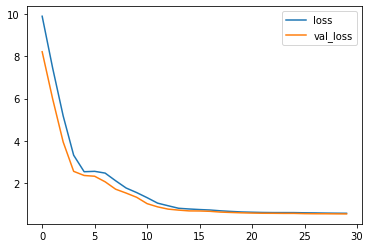

In [15]:
history.plot()